# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice.
unique_mice_count = merged_df['Mouse ID'].nunique()
print(unique_mice_count)

249


In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_df.duplicated (subset=['Mouse ID', 'Timepoint'])
duplicate_mouse_id = merged_df.loc[duplicate_rows, 'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_id)]
duplicate_mouse_data

Data associated with mouse ID(s) with duplicate time points:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID'])
# Drop the mouse with ID 'g989' from the clean DataFrame
cleaned_df = cleaned_df[cleaned_df['Mouse ID'] != 'g989']
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [30]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = cleaned_df['Mouse ID'].nunique()
unique_mice_count

248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_regimen = merged_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = grouped_regimen['Tumor Volume (mm3)'].mean()
median = grouped_regimen['Tumor Volume (mm3)'].median()
variance = grouped_regimen['Tumor Volume (mm3)'].var()
std_dev = grouped_regimen['Tumor Volume (mm3)'].std()
sem = grouped_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': std_dev,
    'SEM': sem
})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

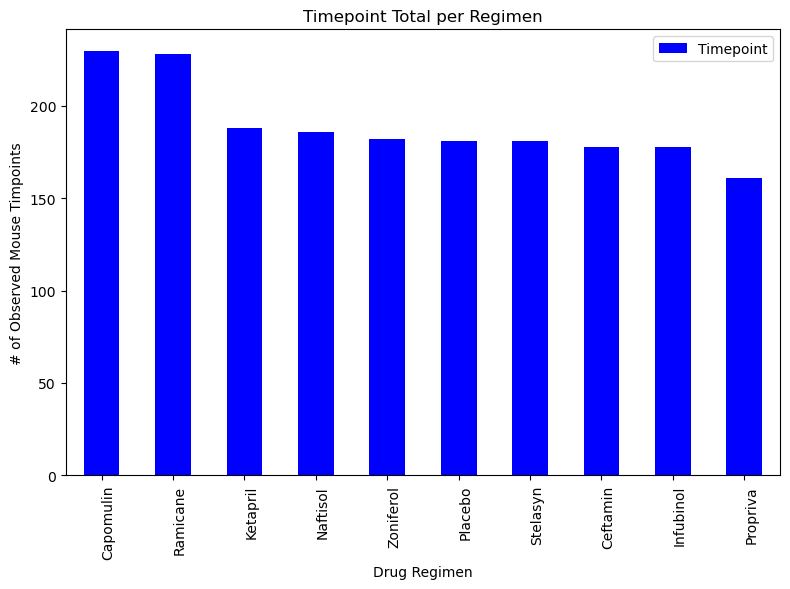

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_data = merged_df[["Drug Regimen", "Timepoint"]]
timepoint_total = timepoint_data.groupby("Drug Regimen").count()

# Sort counts in descending order
timepoint_total = timepoint_total.sort_values("Timepoint", ascending=False)

# Plot using Pandas
fig1 = timepoint_total.plot(kind="bar", facecolor="blue", figsize=(8,6))

# Configure x-tick rotation
xticklabels = timepoint_total.index
fig1.set_xticklabels(xticklabels, rotation=90, rotation_mode="anchor", ha="right", wrap=True)

# Set plot labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timpoints")
plt.title("Timepoint Total per Regimen")
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

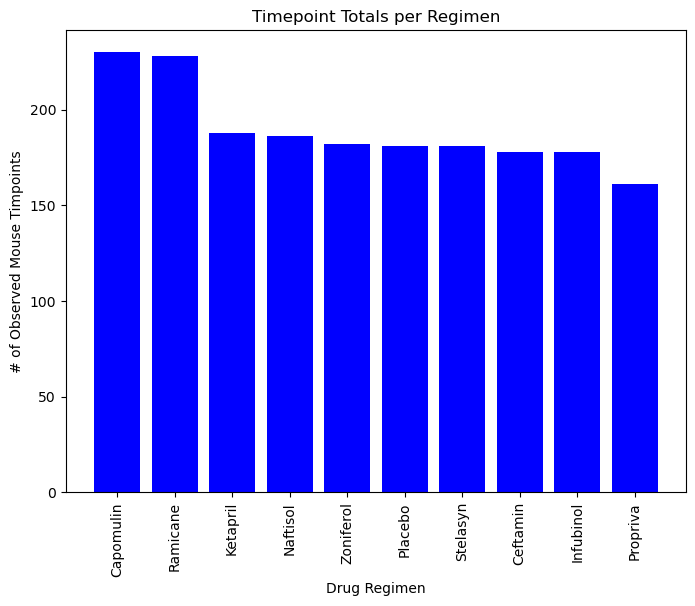

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen = list(timepoint_total.index)
values = list(timepoint_total["Timepoint"])
fig2 = plt.figure(figsize=(8,6))

# Bar plot creation
plt.bar(regimen, values, color="blue", width = 0.8)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timpoints")
plt.title("Timepoint Totals per Regimen")
plt.xticks(rotation=90)
plt.show

Text(0.5, 1.0, '')

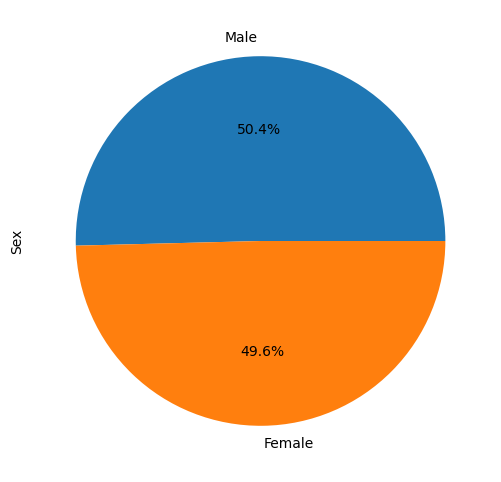

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
gender_counts = cleaned_df['Sex'].value_counts()

# Create the pie chart using Pandas plot() method
gender_counts.plot(kind='pie', autopct='%.1f%%', figsize=(8, 6))
plt.title('')


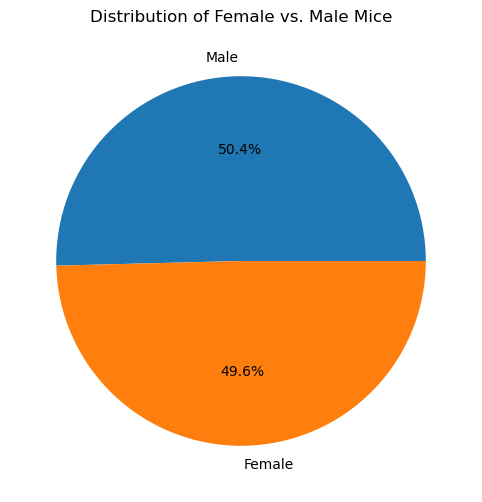

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.1f%%')
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('')

plt.show()

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = merged_df[merged_df['Drug Regimen'].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, merged_df, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    quartiles = final_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = final_volume.loc[(final_volume < lower_bound) | (final_volume > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


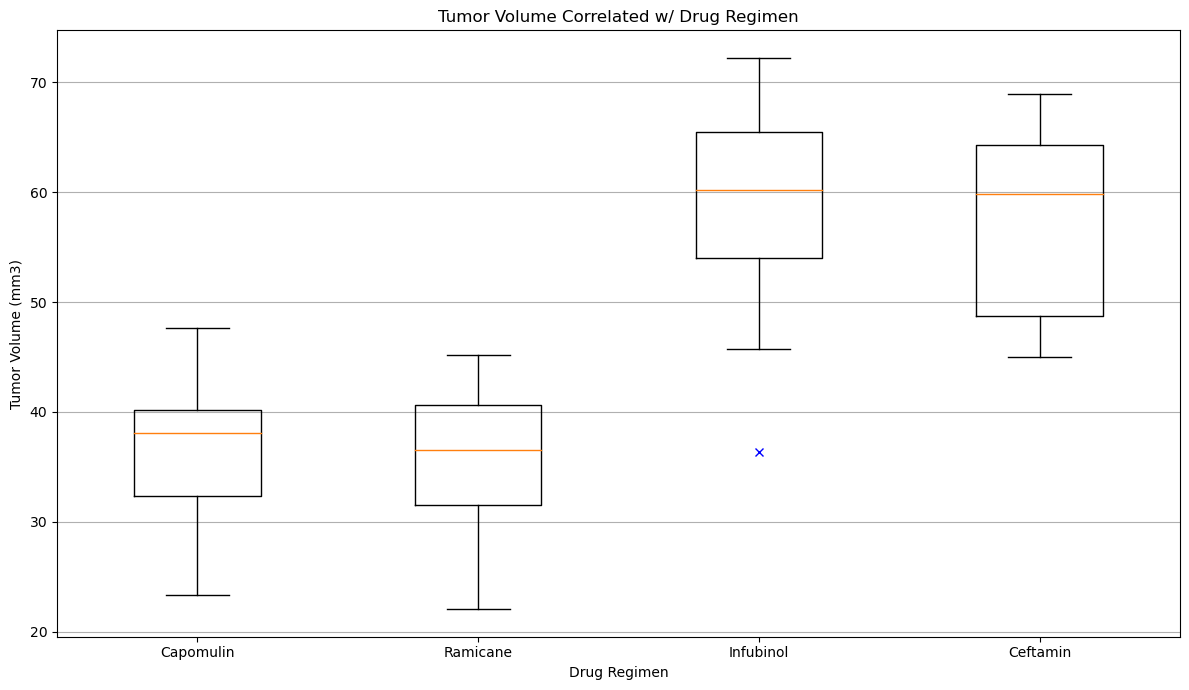

In [46]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Extract final tumor volumes for each treatment and store in a list
tumor_vol_data = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)'] for drug in treatments]

# Create the box plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.boxplot(tumor_vol_data, sym='bx')

# Set title, x and y axis labels
ax.set(title="Tumor Volume Correlated w/ Drug Regimen", xlabel="Drug Regimen", ylabel="Tumor Volume (mm3)")

# Set x-tick labels
plt.xticks([1, 2, 3, 4], treatments)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

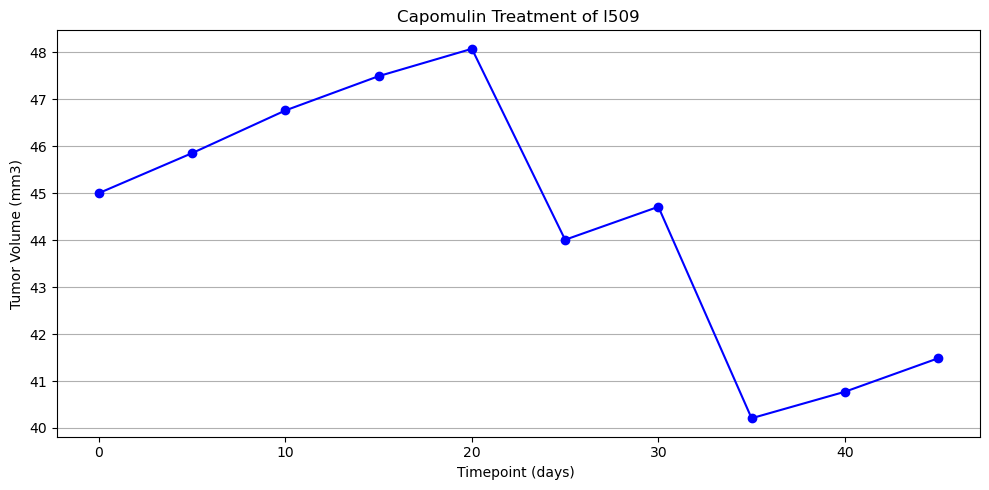

In [51]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_treatment = merged_df[merged_df["Drug Regimen"] == "Capomulin"]


mouse_id = "l509"
mouse_data = capomulin_treatment[capomulin_treatment["Mouse ID"] == mouse_id]


tumor_volume = mouse_data["Tumor Volume (mm3)"]
timepoints = mouse_data["Timepoint"]


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(timepoints, tumor_volume, color='blue', marker='o')
ax.set(title="Capomulin Treatment of l509", xlabel="Timepoint (days) ", ylabel="Tumor Volume (mm3)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

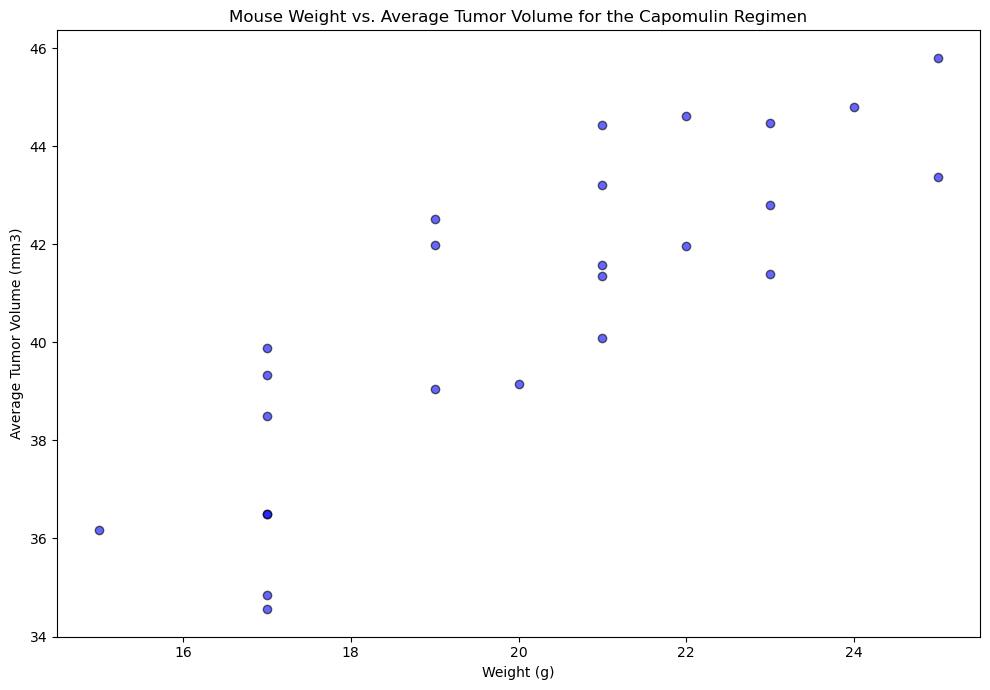

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

average_data = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'mean'
}).reset_index()

plt.figure(figsize=(10, 7))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], color='blue', alpha=0.6, edgecolor='black')
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


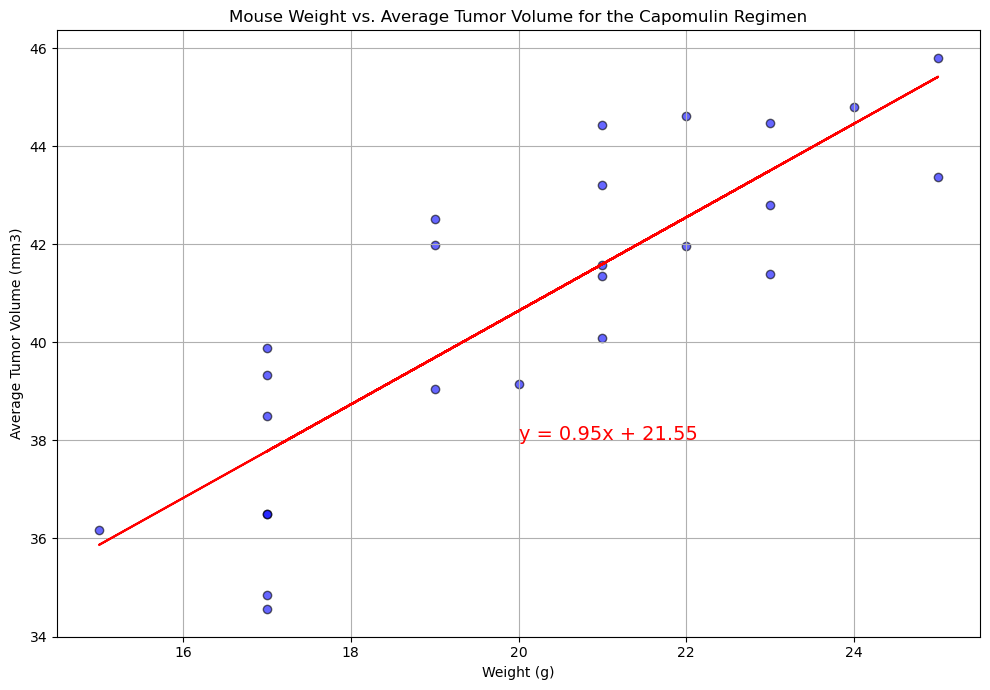

In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient, _ = st.pearsonr(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {correlation_coefficient:.2f}")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])
regress_values = average_data['Weight (g)'] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(10, 7))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], color='blue', alpha=0.6, edgecolor='black')
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen')


plt.plot(average_data['Weight (g)'], regress_values, color='red')
plt.annotate(line_eq, (20, 38), fontsize=14, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.tight_layout()
plt.show()